Набор данных IMDb movie review создан для задач определения тональности текста. Набор включает отзывы на фильмы с сайта IMDb. Отзывы только явно положительные (оценка >= 7) или отрицательные (оценка <= 4), нейтральные отзывы в набор данных не включались.

Размер набора данных 50 тыс отзывов:

- Набор данных для обучения - 25 тыс отзывов

- Набор данных для тестирования - 25 тыс отзывов

Количество положительных и отрицательных отзывов одинаковое.

Разметка набора данных:

0 - отзыв отрицательный
1 - отзыв положительный
С точки зрения машинного обучения это задача бинарной классификации.

### Инициализация библиотек

In [13]:
# Загрузка датасета IMDb
from tensorflow.keras.datasets import imdb

# Последовательная модель нейронной сети
from tensorflow.keras.models import Sequential

# Слои нейронной сети: Полносвязный, векторного представления слов, преобразование матрицы в плоский вектор и слой регуляризации (соответственно)
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout

# Преобразование ответов в One-Hot-Encoding
from tensorflow.keras import utils

# Предварительная обработка текстовой последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
MAX_WORDS = 10000
MAXLEN = 200

### Загрузка данных

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_WORDS)

17465344/17464789 [==============================] - 2s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Костя\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Костя\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [18]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

### Раскодирование текста рецензии
Данные набор IMDB использует частотное кодирование слов. Нужно загрузить словарь, который использовался для кодирования

In [19]:
words_index = imdb.get_word_index()

In [49]:
words_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

### Подготовка данных для обучения

In [4]:
# Каждый отзыва разного размера, переводим к одному размеру (заполняется 0)
x_train = pad_sequences(x_train, maxlen=MAXLEN, padding='post')
x_test = pad_sequences(x_test, maxlen=MAXLEN, padding='post')

In [5]:
x_train

array([[   5,   25,  100, ...,   19,  178,   32],
       [   1,  194, 1153, ...,    0,    0,    0],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ...,    0,    0,    0],
       [   1, 1446, 7079, ...,    0,    0,    0],
       [   1,   17,    6, ...,    0,    0,    0]])

### Создание нейронной сети

In [6]:
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=2, input_length=MAXLEN))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

### Обучение нейронной сети

In [7]:
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1, verbose=2)

Epoch 1/15
176/176 - 1s - loss: 0.6875 - accuracy: 0.5579 - val_loss: 0.6672 - val_accuracy: 0.6784
Epoch 2/15
176/176 - 0s - loss: 0.5829 - accuracy: 0.7535 - val_loss: 0.4883 - val_accuracy: 0.8108
Epoch 3/15
176/176 - 0s - loss: 0.4130 - accuracy: 0.8437 - val_loss: 0.3820 - val_accuracy: 0.8500
Epoch 4/15
176/176 - 0s - loss: 0.3312 - accuracy: 0.8758 - val_loss: 0.3386 - val_accuracy: 0.8608
Epoch 5/15
176/176 - 0s - loss: 0.2873 - accuracy: 0.8899 - val_loss: 0.3183 - val_accuracy: 0.8660
Epoch 6/15
176/176 - 0s - loss: 0.2604 - accuracy: 0.9007 - val_loss: 0.3027 - val_accuracy: 0.8768
Epoch 7/15
176/176 - 0s - loss: 0.2360 - accuracy: 0.9134 - val_loss: 0.2951 - val_accuracy: 0.8816
Epoch 8/15
176/176 - 0s - loss: 0.2232 - accuracy: 0.9193 - val_loss: 0.2897 - val_accuracy: 0.8840
Epoch 9/15
176/176 - 0s - loss: 0.2102 - accuracy: 0.9227 - val_loss: 0.2892 - val_accuracy: 0.8792
Epoch 10/15
176/176 - 0s - loss: 0.1959 - accuracy: 0.9293 - val_loss: 0.2852 - val_accuracy: 0.8848

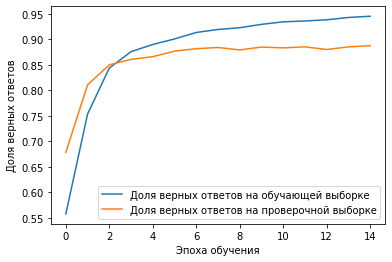

In [8]:
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочной выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### Проверка работы на тестовой выборке

In [36]:
scores = model.evaluate(x_test, y_test, verbose=2)

782/782 - 1s - loss: 0.3060 - accuracy: 0.8696
